In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
from scipy.optimize import minimize

In [50]:
names = ['year','num']
lynx = pd.read_csv('data/lynx.csv', index_col='year', 
                    parse_dates=True,names = names, header = 0)
lynx1 = pd.read_csv('data/lynx.csv', index_col='year', 
                    parse_dates=True,names = names, header = 0)
lynx1.head()

,num
year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


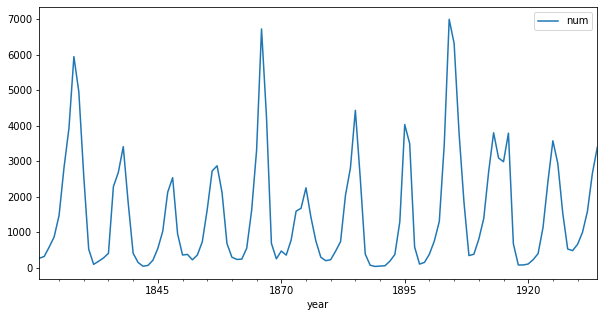

In [51]:
plt.rcParams["figure.figsize"] = (10,5)
lynx.plot(legend=True)
plt.show()

# ARMA

In [52]:
p = 2
q = 2

In [53]:
lynx['y+1'] = lynx['num']. shift(1)
lynx['y+2'] = lynx['num']. shift(2)

In [54]:
lynx = lynx.dropna()

In [55]:
lynx

,num,y+1,y+2
year,,,
1823-01-01,585,321.0,269.0
1824-01-01,871,585.0,321.0
1825-01-01,1475,871.0,585.0
1826-01-01,2821,1475.0,871.0
1827-01-01,3928,2821.0,1475.0
...,...,...,...
1930-01-01,662,485.0,529.0
1931-01-01,1000,662.0,485.0
1932-01-01,1590,1000.0,662.0


In [56]:
from scipy.optimize import minimize

In [57]:
def fun(phi1,phi2,alpha):
    return ( (lynx['num'] - phi1 * lynx['y+1'] - phi2 * lynx['y+2'] + alpha)**2).mean()

In [58]:
series = lynx['num']
mse = lambda x: fun (x[0], x[1], x[2])
bnds = ( (0,1), (0,1),(-1000,1000) )

mini = minimize( mse, (1, 1, 1))

In [59]:
[phi1,phi2,alpha] = mini.x
mini.x

array([ 1.15242154e+00, -6.06230006e-01, -7.10111401e+02])

In [60]:
 app = (phi1 * lynx['y+1'] + phi2 * lynx['y+2'] - alpha)

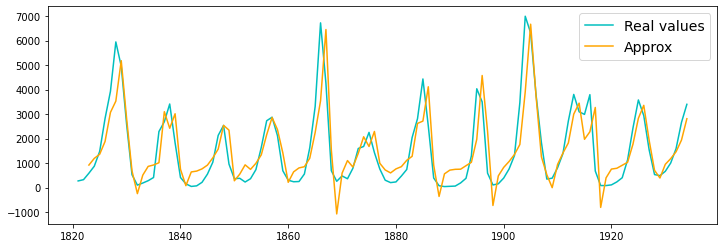

In [61]:
plt.figure(figsize=(12,4))
plt.plot(lynx1['num'], label = 'Real values', c = 'c')
plt.plot(app , label = 'Approx', color='orange')
plt.legend(fontsize = 14)
plt.show()

In [62]:
errors = app - lynx['num']

In [63]:
err = pd.DataFrame(errors, columns = ['err'])
err['e+1'] = err['err']. shift(1)
err['e+2'] = err['err']. shift(2)
err = err.dropna()

In [68]:
def fun2(teta1,teta2,alpha2):
    return ( (err['err'] - teta1 * err['e+1'] - teta2 * err['e+2'] + alpha2)**2).mean()

In [69]:
fun2(2,3,1)

11536179.892849764

In [19]:
mse = lambda x: fun2 (x[0], x[1], x[2])
bnds = ( (-1000,1), (0,1),(-1000,1000) )

mini = minimize( mse, (1, 1, 1) )
mini

      fun: 771098.591678417
 hess_inv: array([[ 6.21033891e-11,  8.47613535e-11, -9.75296643e-10],
       [ 8.47613535e-11,  1.48633952e-06, -1.30125809e-05],
       [-9.75296643e-10, -1.30125809e-05,  1.43965164e-04]])
      jac: array([0.0390625, 0.0078125, 0.0078125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 581
      nit: 16
     njev: 114
   status: 2
  success: False
        x: array([-0.02091015, -0.14952374,  4.08711226])

In [20]:
[teta1,teta2,alpha1] = mini.x
mini.x

array([-0.02091015, -0.14952374,  4.08711226])

In [21]:
 errors = (teta1 * err['e+1'] + teta2 * err['e+2'] - alpha1)

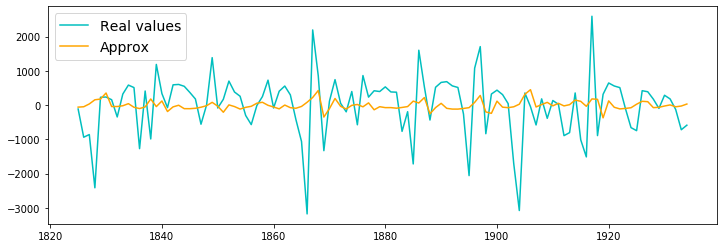

In [22]:
plt.figure(figsize=(12,4))
plt.plot(err['err'], label = 'Real values', c = 'c')
plt.plot(errors , label = 'Approx', color='orange')
plt.legend(fontsize = 14)
plt.show()

In [23]:
totalApp = -errors + app[2:]

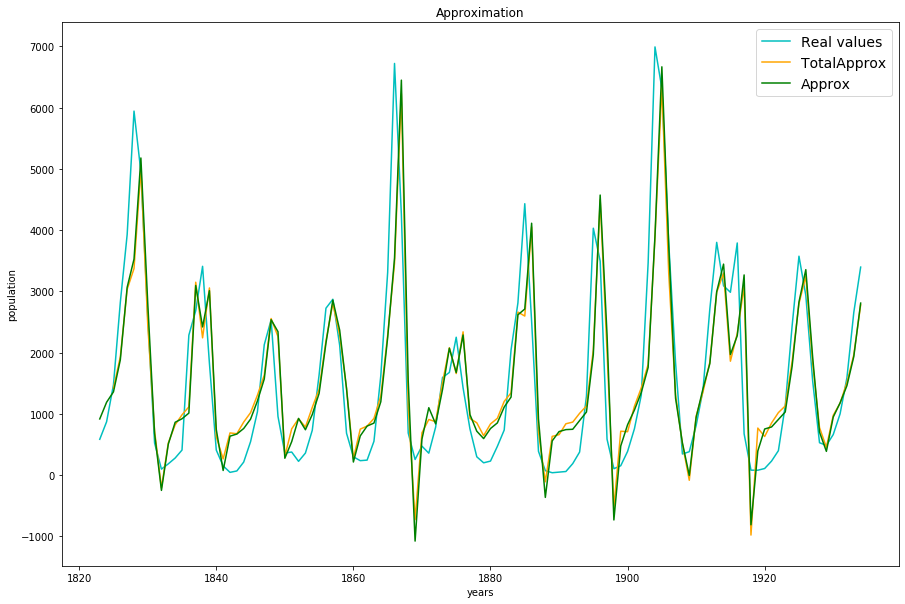

In [24]:
plt.figure(figsize=(15,10))
plt.plot(lynx['num'], label = 'Real values', c = 'c')
plt.plot(totalApp , label = 'TotalApprox', color='orange')
plt.plot(app , label = 'Approx', color='g')

plt.legend(fontsize = 14)
plt.title("Approximation")
plt.xlabel('years')
plt.ylabel('population')
plt.show()

In [25]:
((totalApp - lynx['num'][2:])**2).mean()

771098.5916784168

# Бокс - Кокс 

In [117]:
passengers = pd.read_csv('data/passengers.csv' , index_col = 0)
vals = passengers['num_passengers'].values

In [118]:
from math import log

<AxesSubplot:xlabel='date'>

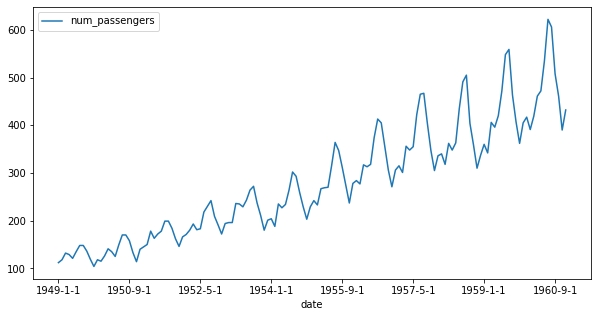

In [119]:
passengers.plot()

In [120]:
passengers['num_passengers'] = passengers['num_passengers'] * 10**10

<AxesSubplot:xlabel='date'>

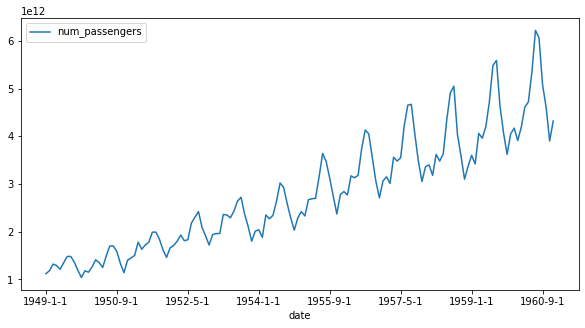

In [121]:
passengers.plot()

In [122]:
T = len(passengers)

In [123]:
def box_cox(l):    
    if l != 0:
        bc = (vals**l -1)/l    
    else:
        bc = np.array(list(map(log,vals) ))
    return bc

In [124]:
def lambda_min(l):
    bc = box_cox(l)
    avg = bc.mean()
    ln = log( sum ((bc - avg)**2)/T ) * T/2
    sm = (l-1)* sum(map(log, vals))
    return ln - sm

In [125]:
mse = lambda x: lambda_min (x[0])

mini = minimize( mse, (1) )
mini

      fun: 679.5431311684134
 hess_inv: array([[0.03867213]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([0.14802272])

In [126]:
l = mini.x[0]
l

0.14802272160720778

In [127]:
bc_res = box_cox(l)

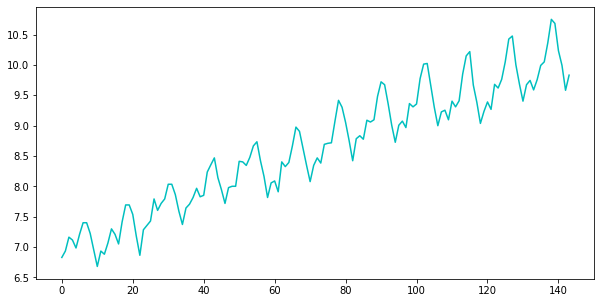

In [128]:
plt.plot(bc_res, label = 'Real values', c = 'c')

In [129]:
bc_series = pd.Series(bc_res)

In [130]:
diff_season = bc_series.diff(periods = 12)

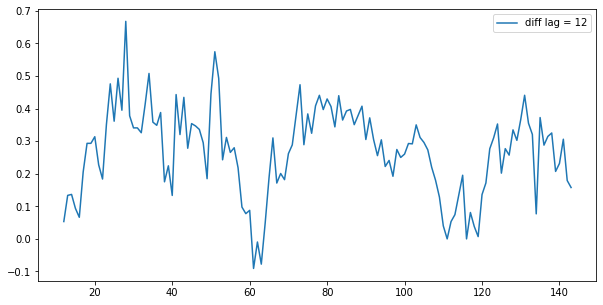

In [131]:
diff_season.plot(label = "diff lag = 12")
plt.legend()
plt.show()

In [132]:
diff_total = diff_season.diff()

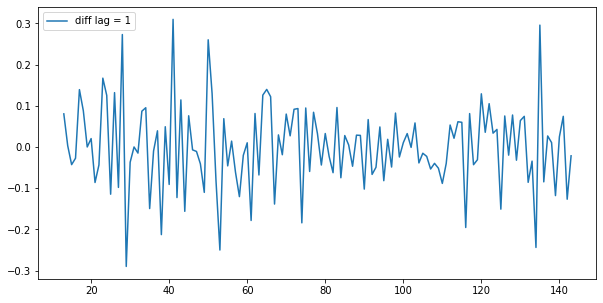

In [133]:
diff_total.plot(label = 'diff lag = 1')
plt.legend()
plt.show()

In [134]:
diff_psng = pd.DataFrame(diff_total, columns = ['num'])

## SARIMA (p = 3,d = 1,q = 2)x(P = 1,D = 1,Q = 0)

- применили сезонное дифференцирование один раз (D) и обычное один раз (d)

In [135]:
p = 3
q = 2

In [136]:
diff_psng['y+1'] = diff_psng['num']. shift(1)
diff_psng['y+2'] = diff_psng['num']. shift(2)
diff_psng['y+3'] = diff_psng['num']. shift(3)
diff_psng['y+12'] = diff_psng['num'].shift(12)

diff_psng = diff_psng.dropna()

In [137]:
diff_psng

,num,y+1,y+2,y+3,y+12
25,-0.114645,0.125195,0.166995,-0.043694,0.080310
26,0.131857,-0.114645,0.125195,0.166995,0.002985
27,-0.098163,0.131857,-0.114645,0.125195,-0.042892
28,0.272862,-0.098163,0.131857,-0.114645,-0.027351
29,-0.289975,0.272862,-0.098163,0.131857,0.139146
...,...,...,...,...,...
139,-0.118025,0.010598,0.026706,-0.084687,-0.019876
140,0.024514,-0.118025,0.010598,0.026706,0.077554
141,0.074345,0.024514,-0.118025,0.010598,-0.032159
142,-0.126833,0.074345,0.024514,-0.118025,0.064099


- авторегрессия порядка 3

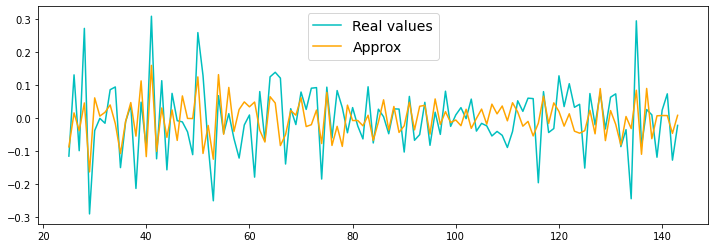

In [138]:
def fun(phi1,phi2,phi3,phi12, alpha):
    return ( (diff_psng['num'] - phi1 * diff_psng['y+1'] - phi2 * diff_psng['y+2'] - phi3 * diff_psng['y+3'] - phi12 * diff_psng['y+12'] + alpha)**2).mean()

series = diff_psng['num']
mse = lambda x: fun (x[0], x[1], x[2], x[3], x[4])

mini = minimize( mse, (1, 1, 1, 1, 1))

[phi1, phi2, phi3, phi12, alpha] = mini.x
mini.x

app = (phi1 * diff_psng['y+1'] + phi2 * diff_psng['y+2'] + phi3 * diff_psng['y+3'] + phi12 * diff_psng['y+12'] - alpha)

plt.figure(figsize=(12,4))
plt.plot(diff_psng['num'], label = 'Real values', c = 'c')
plt.plot(app , label = 'Approx', color='orange')
plt.legend(fontsize = 14)
plt.show()

In [139]:
mini

      fun: 0.0073908315354450785
 hess_inv: array([[ 4.72426311e+01,  1.83178040e+01,  3.33628735e+00,
        -3.97734702e+00, -1.24312563e-01],
       [ 1.83178040e+01,  5.47504227e+01,  1.65212298e+01,
         1.01117166e+00,  4.78204227e-02],
       [ 3.33628735e+00,  1.65212298e+01,  4.75512761e+01,
        -1.06104448e+01, -8.66384269e-02],
       [-3.97734702e+00,  1.01117166e+00, -1.06104448e+01,
         5.10450906e+01,  1.92690147e-01],
       [-1.24312563e-01,  4.78204227e-02, -8.66384269e-02,
         1.92690147e-01,  4.53868402e-01]])
      jac: array([ 2.19244976e-06, -5.09782694e-07, -2.16480112e-06, -8.53906386e-08,
        5.04660420e-08])
  message: 'Optimization terminated successfully.'
     nfev: 192
      nit: 31
     njev: 32
   status: 0
  success: True
        x: array([-0.37042759, -0.0653403 , -0.08843587, -0.39041552,  0.00186682])

- скользящее среднее порядка 2

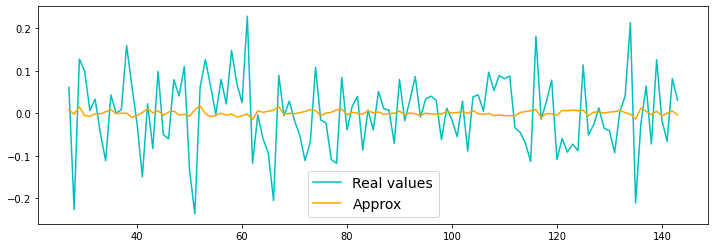

In [140]:
errors = app - diff_psng['num']

err = pd.DataFrame(errors, columns = ['err'])
err['e+1'] = err['err']. shift(1)
err['e+2'] = err['err']. shift(2)
err = err.dropna()

def fun2(teta1,teta2,alpha2):
    return ( (err['err'] - teta1 * err['e+1'] - teta2 * err['e+2'] + alpha2)**2).mean()

mse = lambda x: fun2 (x[0], x[1], x[2])

mini = minimize( mse, (1, 1, 1) )

[teta1,teta2,alpha1] = mini.x

errors = (teta1 * err['e+1'] + teta2 * err['e+2'] - alpha1)

plt.figure(figsize=(12,4))
plt.plot(err['err'], label = 'Real values', c = 'c')
plt.plot(errors , label = 'Approx', color='orange')
plt.legend(fontsize = 14)
plt.show()

In [142]:
errors

27     0.007871
28    -0.001905
29     0.014689
30    -0.004970
31    -0.007203
         ...   
139    0.004664
140   -0.006628
141    0.000295
142    0.005170
143   -0.003812
Length: 117, dtype: float64

In [143]:
mini

      fun: 0.00736431476126477
 hess_inv: array([[6.14769133e+01, 1.03159707e+01, 1.70619316e-02],
       [1.03159707e+01, 6.05957331e+01, 2.70308340e-03],
       [1.70619316e-02, 2.70308340e-03, 4.87116250e-01]])
      jac: array([ 3.91621143e-07, -4.31959052e-07,  7.16536306e-08])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 20
     njev: 21
   status: 0
  success: True
        x: array([-0.06492108, -0.01150159, -0.00070321])

- ARMA (3,2)

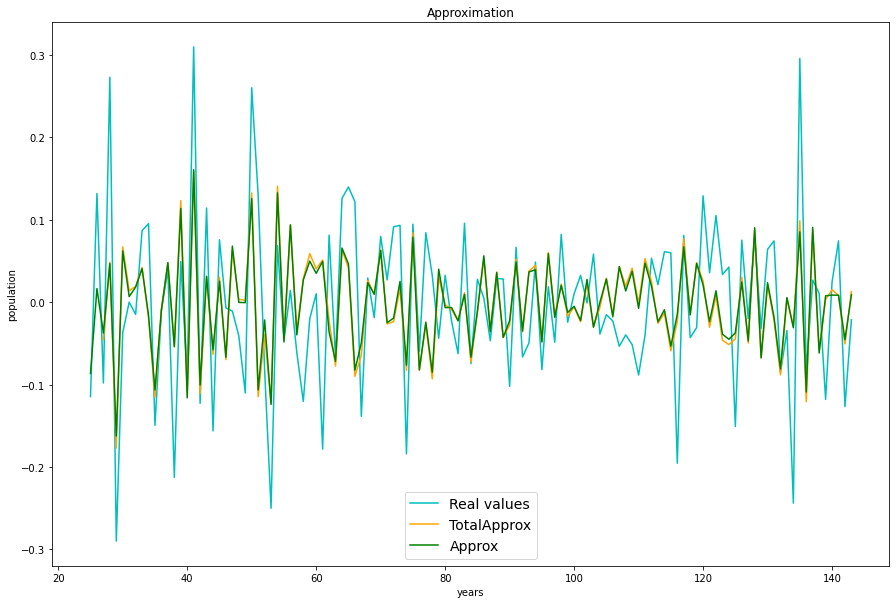

mse =  0.00736431476126477


In [144]:
totalApp = -errors + app[2:]

plt.figure(figsize=(15,10))
plt.plot(diff_psng['num'], label = 'Real values', c = 'c')
plt.plot(totalApp , label = 'TotalApprox', color='orange')
plt.plot(app , label = 'Approx', color='g')

plt.legend(fontsize = 14)
plt.title("Approximation")
plt.xlabel('years')
plt.ylabel('population')
plt.show()

print ('mse = ', ((totalApp - diff_psng['num'][2:])**2).mean())

- прогноз

In [145]:
app_lst = np.array(app)

In [146]:
for h in range(1,12):
    forecast = np.dot(app_lst[-3:], np.array([phi1,phi2,phi3]) ) + phi12 * app_lst[-12] - alpha
    app_lst = np.append(app_lst, [forecast])

In [147]:
app_lst[-11:]

array([ 0.02886378,  0.00972711,  0.00416821, -0.04684094,  0.04097689,
       -0.03937763,  0.04039521, -0.02105606,  0.00861592, -0.01948898,
        0.02489475])

In [37]:
err_lst = np.array(errors)

In [38]:
for h in range(1,12):
    forecast = np.dot(err_lst[-2:], np.array([teta1,teta2]) ) - alpha1
    err_lst = np.append(err_lst, [forecast])

In [39]:
err_lst[-11:]

array([0.01245301, 0.02854434, 0.02010647, 0.01916066, 0.01971858,
       0.01977346, 0.01973666, 0.01973352, 0.01973594, 0.01973612,
       0.01973596])

In [40]:
forecast36 = -err_lst[-11:] + app_lst[-11:]

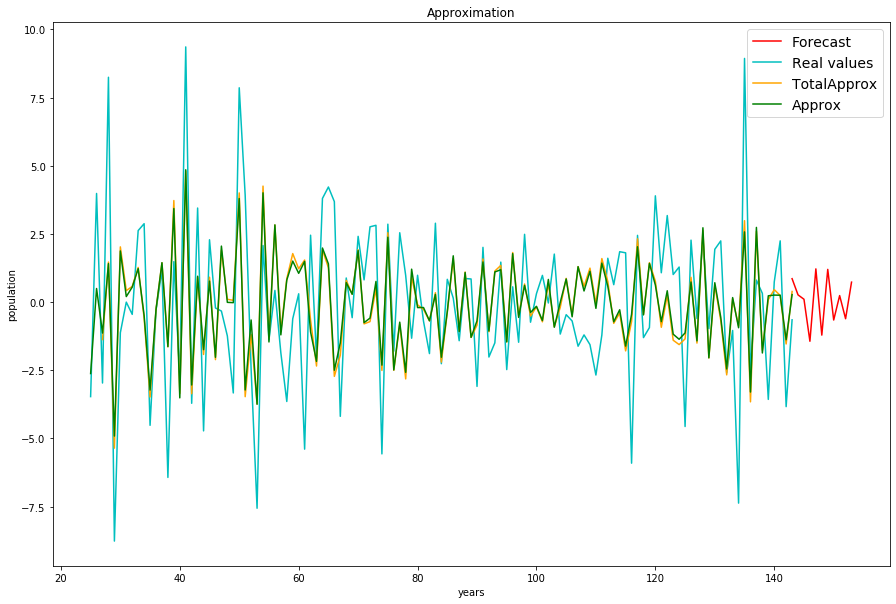

In [41]:
plt.figure(figsize=(15,10))
plt.plot(range(143, 143 + 11),forecast36, label = 'Forecast', c = 'r')
plt.plot(diff_psng['num'], label = 'Real values', c = 'c')
plt.plot(totalApp , label = 'TotalApprox', color='orange')
plt.plot(app , label = 'Approx', color='g')

plt.legend(fontsize = 14)
plt.title("Approximation")
plt.xlabel('years')
plt.ylabel('population')
plt.show()

- возвращение к исходному 

In [42]:
app_for = err_lst + app_lst[2:]